In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import numpy as np

In [72]:
# read in csv as dataframe
county_df = pd.read_csv("county_data_mlseg2.csv", index_col=0)
county_df.head()

,county,state,lat,long,TotalPop,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,34.223334,-82.461707,24788.0,12433.0,8215.0,4101.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,30.295065,-92.414197,62607.0,28425.0,22596.0,5443.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,37.767072,-75.632346,32840.0,16938.0,9172.0,7578.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,43.452658,-116.241552,435117.0,259389.0,130699.0,120539.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,41.330756,-94.471059,7192.0,4183.0,2917.0,1197.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [103]:
X = county_df['votes20_Donald_Trump'].values.reshape(-1,1)
X[:5]

array([[  8215.],
       [ 22596.],
       [  9172.],
       [130699.],
       [  2917.]])

In [104]:
y = county_df.cases
y.head()

0      805.0
1     3182.0
2     1227.0
3    17451.0
4      222.0
Name: cases, dtype: float64

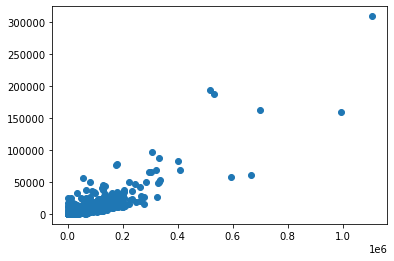

In [105]:
plt.scatter(X,y)
plt.show()

In [106]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
model = LinearRegression()

In [108]:
model.fit(X_train,y_train)

LinearRegression()

In [109]:
X.shape

(3048, 1)

In [110]:
y_pred = model.predict(X)
print(y_pred.shape)

(3048,)


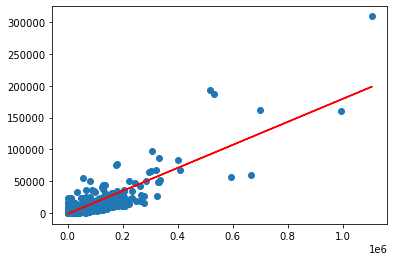

In [111]:
# plot predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [112]:
print(model.coef_)
print(model.intercept_)
print(model.score(X,y))

[0.18060774]
-1229.7187533693423
0.7526565002710869


In [113]:
X2 = county_df['votes20_Joe_Biden'].values.reshape(-1,1)
X2[:5]

array([[  4101.],
       [  5443.],
       [  7578.],
       [120539.],
       [  1197.]])

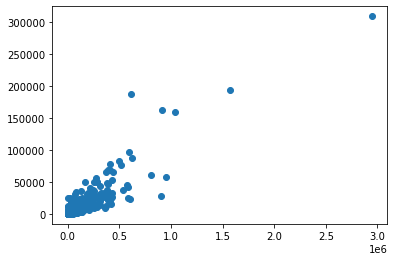

In [114]:
plt.scatter(X2,y)
plt.show()

In [115]:
# split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=42)

In [116]:
model2 = LinearRegression()

In [117]:
model2.fit(X_train2,y_train2)

LinearRegression()

In [118]:
y_pred2 = model.predict(X2)
print(y_pred2.shape)

(3048,)


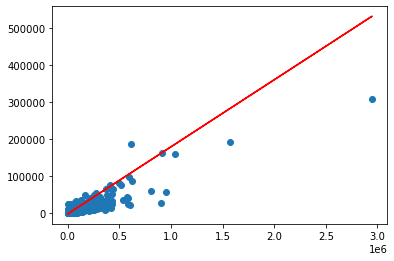

In [119]:
# plot predictions
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.show()

In [120]:
print(model2.coef_)
print(model2.intercept_)
print(model2.score(X2,y))

[0.10699025]
385.29671691103977
0.8171401375142293


In [121]:
X3 = county_df['Employed'].values.reshape(-1,1)
X3[:5]

array([[  9505.],
       [ 24982.],
       [ 13837.],
       [214984.],
       [  3680.]])

In [129]:
# split data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, random_state=42)

In [130]:
model3 = LinearRegression()

In [133]:
model3.fit(X_train3,y_train3)

LinearRegression()

In [134]:
y_pred3 = model3.predict(X3)

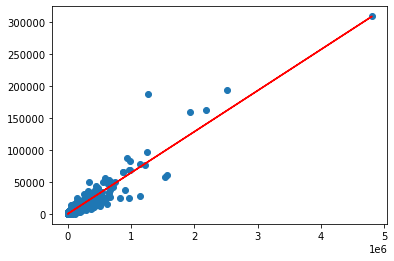

In [135]:
# plot predictions
plt.scatter(X3, y)
plt.plot(X3, y_pred3, color='red')
plt.show()

In [136]:
print(model3.coef_)
print(model3.intercept_)
print(model3.score(X3,y))

[0.06434483]
-199.00208465016794
0.8916331855497374


In [138]:
X4 = county_df['Unemployment'].values.reshape(-1,1)
X4[:5]

array([[9.4],
       [8.9],
       [5.4],
       [4.3],
       [3. ]])

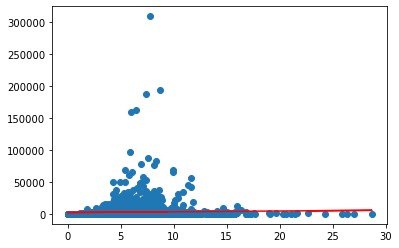

In [141]:
# split data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, random_state=42)

model4 = LinearRegression()

model4.fit(X_train4,y_train4)

y_pred4 = model4.predict(X4)

# plot predictions
plt.scatter(X4, y)
plt.plot(X4, y_pred4, color='red')
plt.show()

In [142]:
print(model4.coef_)
print(model4.intercept_)
print(model4.score(X4,y))

[120.59983504]
2163.969217423226
0.0015341375355295561


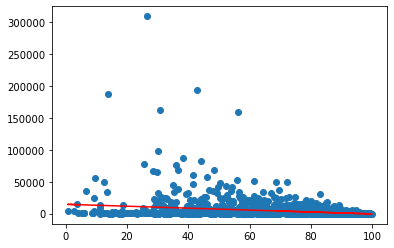

[-150.80351164]
14562.376207361061
0.06900640892409537


In [146]:
X5 = county_df['White'].values.reshape(-1,1)
# split data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, random_state=42)

model5 = LinearRegression()

model5.fit(X_train5,y_train5)

y_pred5 = model5.predict(X5)

# plot predictions
plt.scatter(X5, y)
plt.plot(X5, y_pred5, color='red')
plt.show()

print(model5.coef_)
print(model5.intercept_)
print(model5.score(X5,y))

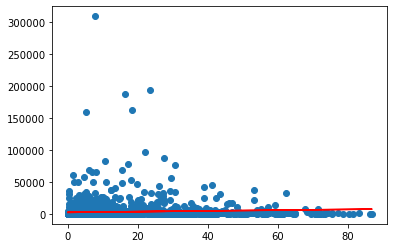

[57.96763962]
2418.6149069652006
0.008181639264146945


In [147]:
X6 = county_df['Black'].values.reshape(-1,1)

# split data into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y, random_state=42)

model6 = LinearRegression()

model6.fit(X_train6,y_train6)

y_pred6 = model6.predict(X6)

# plot predictions
plt.scatter(X6, y)
plt.plot(X6, y_pred6, color='red')
plt.show()

print(model6.coef_)
print(model6.intercept_)
print(model6.score(X6,y))